# load datasets

In [88]:
import numpy as np
import pandas as pd
import os

# load boston house prices dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df_boston_features = pd.DataFrame(data = boston_dataset.data, columns=boston_dataset.feature_names)
df_boston_target = pd.DataFrame(data = boston_dataset.target, columns=['price'])

# load Pima Indians Diabetes dataset
diabetes_dataset_file = './datasets/diabetes_dataset/diabetes.csv'
df_diabetes = pd.read_csv(diabetes_dataset_file)
df_diabetes_target = df_diabetes.loc[:,['Outcome']]
df_diabetes_features = df_diabetes.drop(['Outcome'], axis=1)

# load Iris flowers dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris_features = pd.DataFrame(data = iris_dataset.data, columns=iris_dataset.feature_names)
df_iris_target = pd.DataFrame(data = iris_dataset.target, columns=['class'])

# create a synthetic regression dataset of X, Y values.
from sklearn.datasets import make_regression
SyntheticX, SyntheticY = make_regression(n_samples=50, n_features=1, noise=10.0, random_state=17)

# create a synthetic binary classification dataset with 2 features.
from sklearn.datasets import make_classification
Synthetic_BinaryClassX, Synthetic_BinaryClassY = make_classification(n_samples=50, n_features=2, n_redundant=0, n_classes=2)

In [89]:
# normalize attribute values
from sklearn.preprocessing import MinMaxScaler

diabetes_scaler = MinMaxScaler()
diabetes_scaler.fit(df_diabetes_features)
nd_diabetes_features = diabetes_scaler.transform(df_diabetes_features)
df_diabetes_features_normalized = pd.DataFrame(data=nd_diabetes_features, columns=df_diabetes_features.columns)

iris_scaler = MinMaxScaler()
iris_scaler.fit(df_iris_features)
nd_iris_features = iris_scaler.transform(df_iris_features)
df_iris_features_normalized = pd.DataFrame(data=nd_iris_features, columns=df_iris_features.columns)

x_scaler = MinMaxScaler()
x_scaler.fit(SyntheticX.reshape(-1,1))
SyntheticX = x_scaler.transform(SyntheticX.reshape(-1,1))

y_scaler = MinMaxScaler()
y_scaler.fit(SyntheticY.reshape(-1,1))
SyntheticY = y_scaler.transform(SyntheticY.reshape(-1,1))

/Users/abhishekmishra/anaconda3/envs/AWS_ML_Book/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [90]:
# print a description of the boston housing dataset.
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# creating a 75/25 training and validation set

In [91]:

# create a training dataset and a test dataset using a 75/25 split.
from sklearn.model_selection import train_test_split

diabetes_split = train_test_split(df_diabetes_features_normalized, df_diabetes_target, 
                              test_size=0.25, random_state=17)
df_diabetes_features_train = diabetes_split[0]
df_diabetes_features_test = diabetes_split[1]
df_diabetes_target_train = diabetes_split[2]
df_diabetes_target_test = diabetes_split[3]


boston_split = train_test_split(df_boston_features, df_boston_target, 
                              test_size=0.25, random_state=17)
df_boston_features_train = boston_split[0]
df_boston_features_test = boston_split[1]
df_boston_target_train = boston_split[2]
df_boston_target_test = boston_split[3]

iris_split = train_test_split(df_iris_features_normalized, df_iris_target, 
                              test_size=0.25, random_state=17)
df_iris_features_train = iris_split[0]
df_iris_features_test = iris_split[1]
df_iris_target_train = iris_split[2]
df_iris_target_test = iris_split[3]


# Evaluating Regression Models

In [92]:
# train a linear model on the Boston house prices dataset.
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression(fit_intercept=True)
linear_reg_model.fit(df_boston_features_train, df_boston_target_train)

# create a decision tree based regressor on the Boston house prices dataset.
from sklearn.tree import DecisionTreeRegressor
dtree_reg_model = DecisionTreeRegressor(max_depth=10)
dtree_reg_model.fit(df_boston_features_train, df_boston_target_train.values.ravel())

# use the  models to create predictions on the test set
linear_reg_predictions = linear_reg_model.predict(df_boston_features_test)
dtree_reg_predictions = dtree_reg_model.predict(df_boston_features_test)

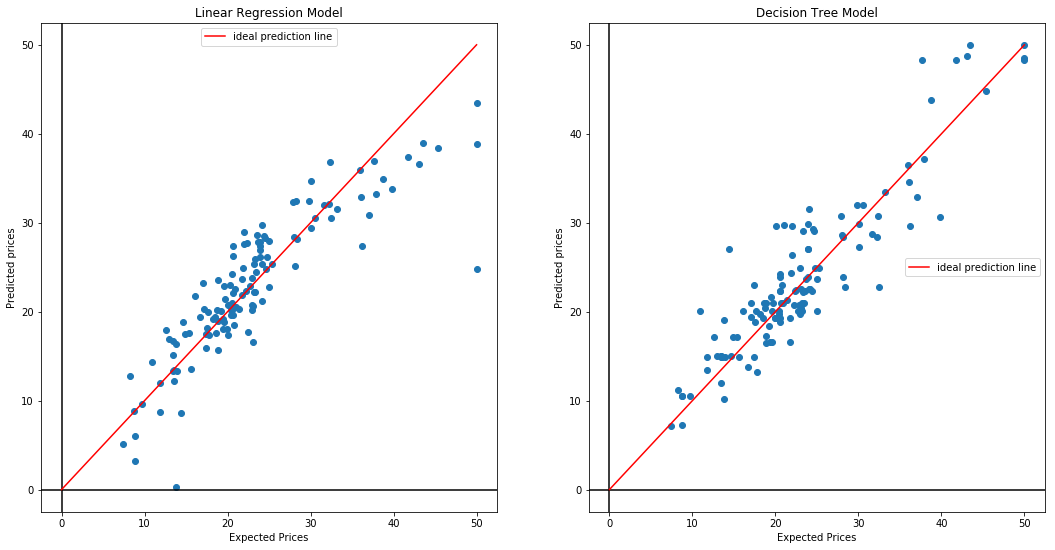

In [93]:
# create a scatter plot of predicted vs actual values

%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18,9))
axes[0].scatter(df_boston_target_test, linear_reg_predictions)
axes[0].set_xlabel("Expected Prices")
axes[0].set_ylabel("Predicted prices")
axes[0].set_title("Linear Regression Model")
axes[0].axhline(y=0, color='k')
axes[0].axvline(x=0, color='k')

axes[1].scatter(df_boston_target_test, dtree_reg_predictions)
axes[1].set_xlabel("Expected Prices")
axes[1].set_ylabel("Predicted prices")
axes[1].set_title("Decision Tree Model")
axes[1].axhline(y=0, color='k')
axes[1].axvline(x=0, color='k')

# plot the ideal prediction line
IdealPrices = np.linspace(0.0, df_boston_target_test.values.max(), 50)
IdealPredictions = IdealPrices
axes[0].plot(IdealPrices, IdealPredictions, color='#ff0000', label='ideal prediction line')
axes[1].plot(IdealPrices, IdealPredictions, color='#ff0000', label='ideal prediction line')

axes[0].legend()
axes[1].legend()

In [94]:
# compute MSE , RMSE, using Scikit-Learn

from sklearn.metrics import mean_squared_error
mse_linear_reg_model = mean_squared_error(df_boston_target_test, linear_reg_predictions)
mse_dtree_reg_model = mean_squared_error(df_boston_target_test, dtree_reg_predictions)

from math import sqrt
rmse_linear_reg_model = sqrt(mse_linear_reg_model)
rmse_dtree_reg_model = sqrt(mse_dtree_reg_model)

print (rmse_linear_reg_model, rmse_dtree_reg_model)

4.256139223131222 3.6916323894267196


In [95]:
# compute coefficient of determination (r2 score)

from sklearn.metrics import r2_score
r2_linear_reg_model = r2_score(df_boston_target_test, linear_reg_predictions)
r2_dtree_reg_model = r2_score(df_boston_target_test, dtree_reg_predictions)

print (r2_linear_reg_model, r2_dtree_reg_model)

0.7663974484228384 0.8242550615242343


# Evaluating Binary Classification Models

In [96]:
# train an SVM classifier for the features of the diabetes dataset using a RBF kernel
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1, gamma='auto', probability=True)
svc_model.fit(df_diabetes_features_train, df_diabetes_target_train.values.ravel())

# train a logistic regression model on the diabetes dataset
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear')
logit_model.fit(df_diabetes_features_train, df_diabetes_target_train.values.ravel())

# train a decision tree based binary classifier.
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=4)
dtree_model.fit(df_diabetes_features_train, df_diabetes_target_train.values.ravel())

# use the models to create predictions on the diabetes test set
svc_predictions = svc_model.predict(df_diabetes_features_test)
logit_predictions = logit_model.predict(df_diabetes_features_test)
dtree_predictions = dtree_model.predict(df_diabetes_features_test)

In [97]:
# simplistic metric - the percentage of correct predictions
svc_correct = svc_predictions == df_diabetes_target_test.values.ravel()
svc_correct_percent = np.count_nonzero(svc_correct) / svc_predictions.size * 100

logit_correct = logit_predictions == df_diabetes_target_test.values.ravel()
logit_correct_percent = np.count_nonzero(logit_correct) / logit_predictions.size * 100

dtree_correct = dtree_predictions == df_diabetes_target_test.values.ravel()
dtree_correct_percent = np.count_nonzero(dtree_correct) / dtree_predictions.size * 100

print (svc_correct_percent, logit_correct_percent, dtree_correct_percent)

73.95833333333334 76.5625 75.52083333333334


In [98]:
# compute confusion matrix
from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(df_diabetes_target_test.values.ravel(), svc_predictions)
cm_logit = confusion_matrix(df_diabetes_target_test.values.ravel(), logit_predictions)
cm_dtree = confusion_matrix(df_diabetes_target_test.values.ravel(), dtree_predictions)

# extract true negative , false positive, false negative, true positive.
#
# the sklearn confusion_matrix() function returns in the following matrix
#
#       TN     FP
#       FN     TP

tn_svc, fp_svc, fn_svc, tp_svc = cm_svc.ravel()
tn_logit, fp_logit, fn_logit, tp_logit = cm_logit.ravel()
tn_dtree, fp_dtree, fn_dtree, tp_dtree = cm_dtree.ravel()


In [99]:
print (tn_svc, fp_svc, fn_svc, tp_svc)

113 8 42 29


In [100]:
print (tn_logit, fp_logit, fn_logit, tp_logit)

113 8 37 34


In [101]:
print (tn_dtree, fp_dtree, fn_dtree, tp_dtree)

103 18 29 42


In [102]:
# compute accuracy, precision, and recall

accuracy_svc = (tp_svc + tn_svc) / (tn_svc + fp_svc + fn_svc + tp_svc)
accuracy_logit = (tp_logit + tn_logit) / (tn_logit + fp_logit + fn_logit + tp_logit)
accuracy_dtree = (tp_dtree + tn_dtree) / (tn_dtree + fp_dtree + fn_dtree + tp_dtree)

precision_svc = tp_svc / (tp_svc + fp_svc)
precision_logit = tp_logit / (tp_logit + fp_logit)
precision_dtree = tp_dtree / (tp_dtree + fp_dtree)

recall_svc = tp_svc / (tp_svc + fn_svc)
recall_logit = tp_logit / (tp_svc + fn_logit)
recall_dtree = tp_dtree / (tp_dtree + fn_dtree)

In [103]:
print (accuracy_svc, accuracy_logit, accuracy_dtree)

0.7395833333333334 0.765625 0.7552083333333334


In [104]:
print (precision_svc, precision_logit, precision_dtree)

0.7837837837837838 0.8095238095238095 0.7


In [105]:
print (recall_svc, recall_logit, recall_dtree)

0.4084507042253521 0.5151515151515151 0.5915492957746479


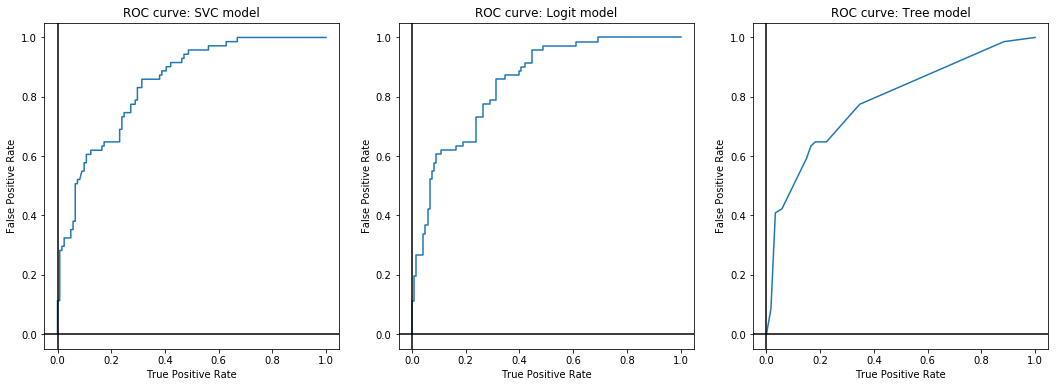

In [106]:
# plot ROC curves for the three classifiers.

# compute prediction probabilities
svc_probabilities = svc_model.predict_proba(df_diabetes_features_test)
logit_probabilities = logit_model.predict_proba(df_diabetes_features_test)
dtree_probabilities = dtree_model.predict_proba(df_diabetes_features_test)

# calculate the FPR and TPR for all thresholds of the SVC model
import sklearn.metrics as metrics
svc_fpr, svc_tpr, svc_thresholds = metrics.roc_curve(df_diabetes_target_test.values.ravel(), 
                                                     svc_probabilities[:,1], 
                                                     pos_label=1, 
                                                     drop_intermediate=False)

# calculate the FPR and TPR for all thresholds of the logistic regression model
logit_fpr, logit_tpr, logit_thresholds = metrics.roc_curve(df_diabetes_target_test.values.ravel(), 
                                                           logit_probabilities[:,1],
                                                           pos_label=1, 
                                                           drop_intermediate=False)

# calculate the FPR and TPR for all thresholds of the decision tree model
dtree_fpr, dtree_tpr, dtree_thresholds = metrics.roc_curve(df_diabetes_target_test.values.ravel(), 
                                                           dtree_probabilities[:,1], 
                                                           pos_label=1,
                                                           drop_intermediate=False)



# plot ROC curves
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,6))

axes[0].set_title('ROC curve: SVC model')
axes[0].set_xlabel("True Positive Rate")
axes[0].set_ylabel("False Positive Rate")
axes[0].plot(svc_fpr, svc_tpr)
axes[0].axhline(y=0, color='k')
axes[0].axvline(x=0, color='k')

axes[1].set_title('ROC curve: Logit model')
axes[1].set_xlabel("True Positive Rate")
axes[1].set_ylabel("False Positive Rate")
axes[1].plot(logit_fpr, logit_tpr)
axes[1].axhline(y=0, color='k')
axes[1].axvline(x=0, color='k')

axes[2].set_title('ROC curve: Tree model')
axes[2].set_xlabel("True Positive Rate")
axes[2].set_ylabel("False Positive Rate")
axes[2].plot(dtree_fpr, dtree_tpr)
axes[2].axhline(y=0, color='k')
axes[2].axvline(x=0, color='k')

In [107]:
# compute AUC metrics for the three models
svc_auc = metrics.auc(svc_fpr, svc_tpr)
logit_auc = metrics.auc(logit_fpr, logit_tpr)
dtree_auc = metrics.auc(dtree_fpr, dtree_tpr)

print (svc_auc, logit_auc, dtree_auc)

0.845186823419858 0.8467000349202654 0.7846001629612384


# Evaluating Multi-class Classification Models.

In [108]:
# softmax (a.k.a multinomial regression) classifier
from sklearn.linear_model import LogisticRegression
softmax_logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='lbfgs', multi_class='multinomial')
softmax_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# create a decision tree based multi-class classifier.
from sklearn.tree import DecisionTreeClassifier
mc_dtree_model = DecisionTreeClassifier(max_depth=4)
mc_dtree_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

# use the  model to create predictions on the test set
softmax_logit_predictions = softmax_logit_model.predict(df_iris_features_test)
mc_predictions = mc_dtree_model.predict(df_iris_features_test)

# compute confusion matrix
from sklearn.metrics import confusion_matrix

cm_softmax = confusion_matrix(df_iris_target_test.values.ravel(), softmax_logit_predictions)
cm_mc_dtree = confusion_matrix(df_iris_target_test.values.ravel(), mc_predictions)

In [109]:
print(cm_softmax)

[[10  0  0]
 [ 0 14  1]
 [ 0  1 12]]


In [110]:
print(cm_mc_dtree)

[[10  0  0]
 [ 0 15  0]
 [ 0  1 12]]


In [111]:
# plot confusion matrices as heatmaps
%matplotlib inline
import matplotlib.pyplot as plt

# plot the confusion matrix as a heat map using Matplotlib functions.
#
# portions of this code have been adapted from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cmatrix, class_labels, axes, title, cmap):

    heatmap_image = axes.imshow(cmatrix, interpolation='nearest', cmap=cmap)
    axes.figure.colorbar(heatmap_image, ax=axes)
    
    num_rows = cmatrix.shape[0]
    num_cols = cmatrix.shape[1]
    
    axes.set_title(title)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('True')
    
    axes.set_xticks(np.arange(num_cols))
    axes.set_yticks(np.arange(num_rows))
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels)
    
    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if normalize else 'd'
    thresh = cmatrix.max() / 2.
    for y in range(num_rows):
        for x in range(num_cols):
            axes.text(x, y, format(cmatrix[y, x], '.0f'),
                    ha="center", va="center",
                    color="white" if cmatrix[y, x] > thresh else "black")


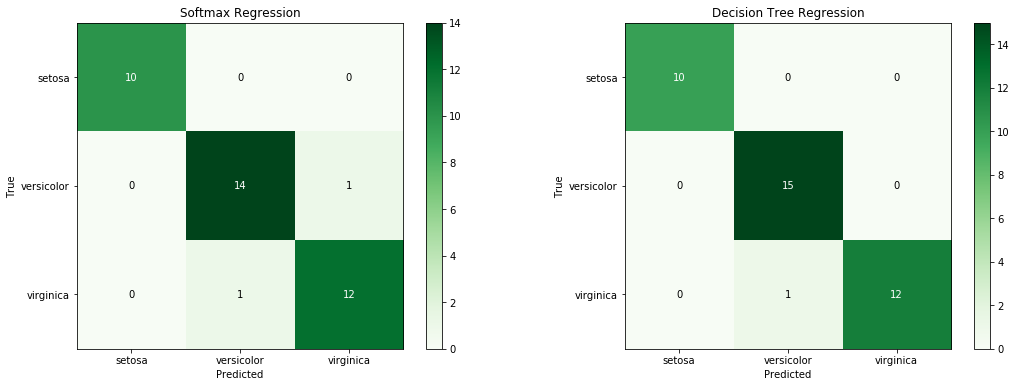

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

plot_confusion_matrix(cm_softmax, 
                      iris_dataset.target_names, axes[0], 
                      "Softmax Regression", 
                      plt.cm.Greens)

plot_confusion_matrix(cm_mc_dtree, 
                      iris_dataset.target_names, axes[1], 
                      "Decision Tree Regression", 
                      plt.cm.Greens)

# Grid search for optimal hyperparameters

In [119]:
# use grid search to find the hyperparameters that result 
# in the best accuracy score for a decision tree 
# based classifier on the Iris Flowers dataset
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_params = {  
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'presort': [True, False]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),  
                           param_grid=grid_params, scoring='accuracy',
                           cv=10, n_jobs=-1)

grid_search.fit(df_iris_features.values, df_iris_target)  

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_features': ['auto', 'sqrt', 'log2'], 'presort': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
best_parameters = grid_search.best_params_  
print(best_parameters)  

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 12, 'presort': False, 'splitter': 'random'}


In [118]:
best_accuracy = grid_search.best_score_  
print(best_accuracy)  

0.98
